# dlt’s pre-built Sources and Destinations
Our verified sources are the simplest way to get started with building your stack. Choose from any of our fully customizable 30+ pre-built sources, such as any SQL database, Google Sheets, Salesforce and others.

With our numerous destinations you can load data to a local database, warehouse or a data lake. Choose from Snowflake, Databricks and more.

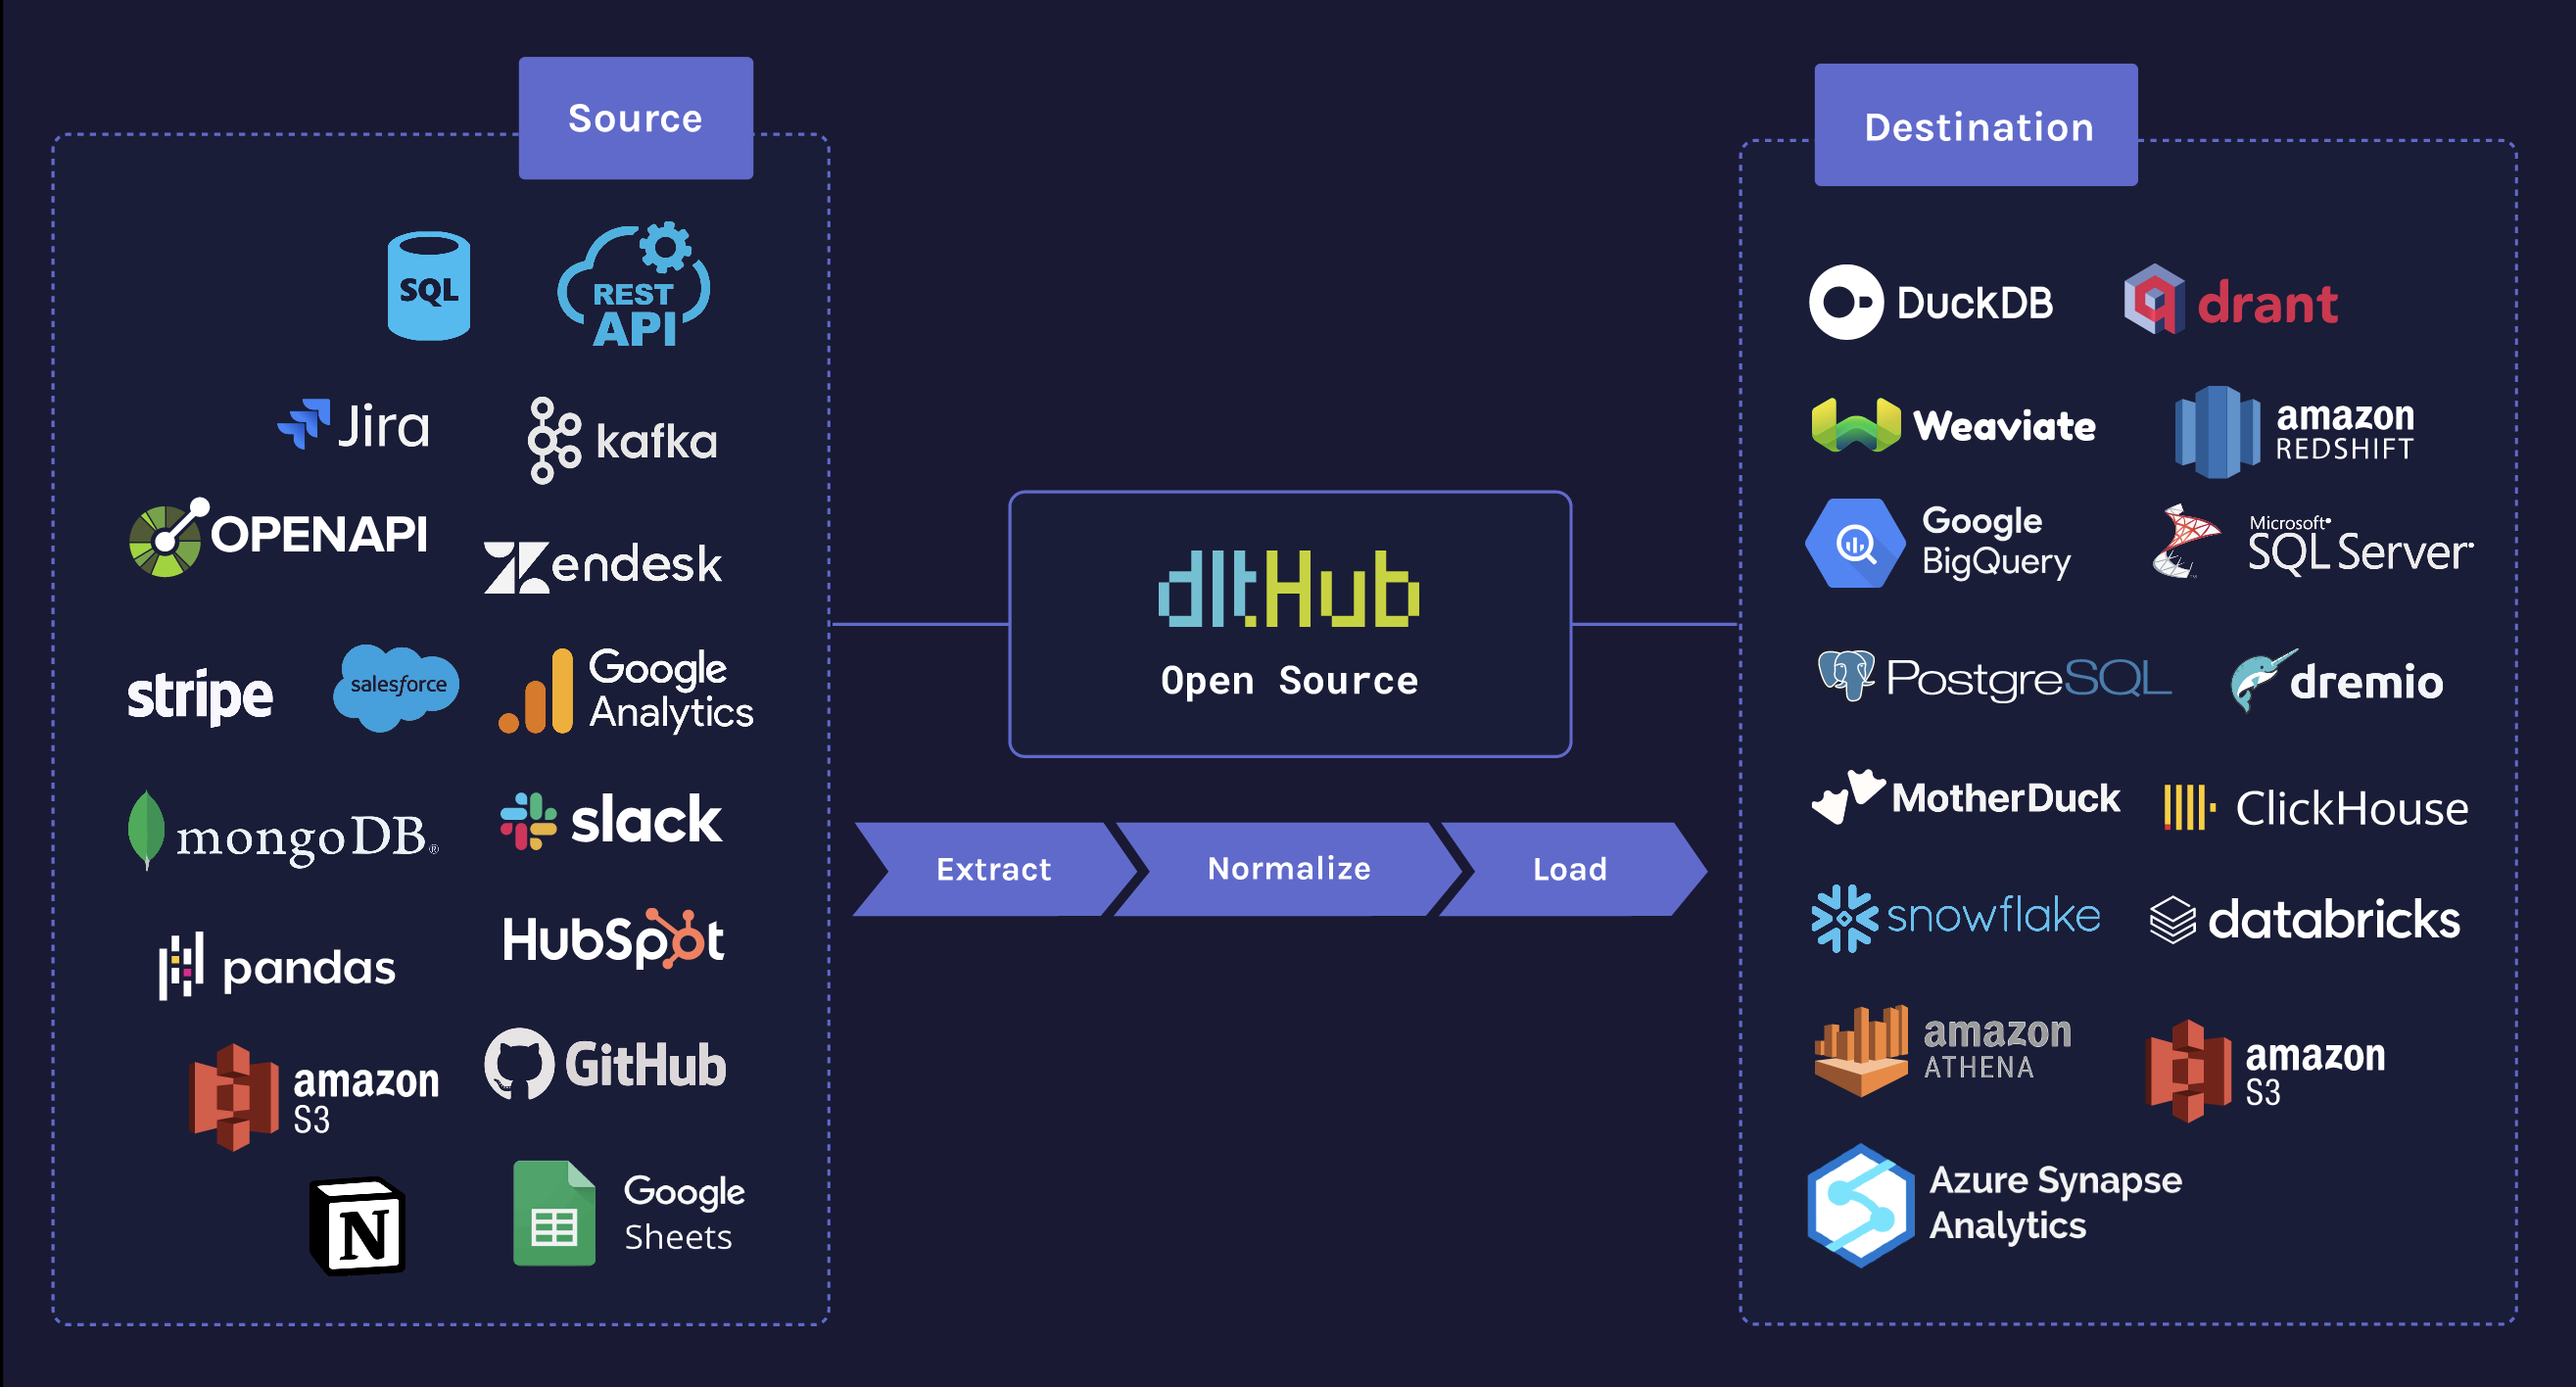

In [1]:
%%capture
pip install dlt[duckdb]

# Use existed verified sources
To use [existed verified source](https://dlthub.com/docs/dlt-ecosystem/verified-sources/), just run the dlt init command.

List all verified sources:



In [2]:
!dlt init --list-verified-sources

Looking up for verified sources in https://github.com/dlt-hub/verified-sources.git...
github: Source that load github issues, pull requests and reactions for a specific repository via customizable graphql query. Loads events incrementally.
slack: Fetches Slack Conversations, History and logs.
pokemon: This source provides data extraction from an example source as a starting point for new pipelines.
pipedrive: Highly customizable source for Pipedrive, supports endpoint addition, selection and column rename
sql_database: Source that loads tables form any SQLAlchemy supported database, supports batching requests and incremental loads.
freshdesk: This source uses Freshdesk API and dlt to load data such as Agents, Companies, Tickets
airtable: Source that loads tables form Airtable.
mux: Loads Mux views data using https://docs.mux.com/api-reference
inbox: Reads messages and attachments from e-mail inbox via IMAP protocol
google_sheets: Loads Google Sheets data from tabs, named and explicit r

This command shows all available verified sources and their short descriptions. For each source, checks if your local dlt version requires update and prints the relevant warning.

Consider an example of a pipeline for Pokemon API.

This command will initialize the pipeline example with Pokemon as the source and duckdb as the destination:

In [4]:
!dlt init rest_api lancedb       # just trying out rest_api source and lancedb as destination

Looking up the init scripts in https://github.com/dlt-hub/verified-sources.git...
Cloning and configuring a verified source rest_api (Generic API Source)
Do you want to proceed? [Y/n]: y

Verified source rest_api was added to your project!
* See the usage examples and code snippets to copy from rest_api_pipeline.py
* Add credentials for lancedb and other secrets in ./.dlt/secrets.toml
* Add the required dependencies to requirements.txt:
  dlt[lancedb]>=0.5.2
  If the dlt dependency is already added, make sure you install the extra for lancedb to it
  To install with pip: pip3 install 'dlt[lancedb]>=0.5.2'

* Read https://dlthub.com/docs/walkthroughs/create-a-pipeline for more information


In [3]:
!dlt --non-interactive init pokemon duckdb

Looking up the init scripts in https://github.com/dlt-hub/verified-sources.git...
Cloning and configuring a verified source pokemon (This source provides data extraction from an example source as a starting point for new pipelines.)

Verified source pokemon was added to your project!
* See the usage examples and code snippets to copy from pokemon_pipeline.py
* Add credentials for duckdb and other secrets in ./.dlt/secrets.toml
* requirements.txt was created. Install it with:
pip3 install -r requirements.txt
* Read https://dlthub.com/docs/walkthroughs/create-a-pipeline for more information


In [5]:
!python pokemon_pipeline.py

Pipeline pokemon load step completed in 1.22 seconds
1 load package(s) were loaded to destination duckdb and into dataset pokemon_data
The duckdb destination used duckdb:////content/pokemon.duckdb location to store data
Load package 1725162183.0919106 is LOADED and contains no failed jobs


In [6]:
import duckdb                                             # pokemon.duckdb is pipeline, pokemon_data is schema where dataset is loaded, pokemon is table.

conn = duckdb.connect(f"pokemon.duckdb")
conn.sql(f"SET search_path = 'pokemon_data'")
display(conn.sql("DESCRIBE"))
data_table = conn.sql("SELECT * FROM pokemon").df()
data_table

┌──────────┬──────────────┬─────────────────────┬──────────────────────┬───────────────────────────────────┬───────────┐
│ database │    schema    │        name         │     column_names     │           column_types            │ temporary │
│ varchar  │   varchar    │       varchar       │      varchar[]       │             varchar[]             │  boolean  │
├──────────┼──────────────┼─────────────────────┼──────────────────────┼───────────────────────────────────┼───────────┤
│ pokemon  │ pokemon_data │ _dlt_loads          │ [load_id, schema_n…  │ [VARCHAR, VARCHAR, BIGINT, TIME…  │ false     │
│ pokemon  │ pokemon_data │ _dlt_pipeline_state │ [version, engine_v…  │ [BIGINT, BIGINT, VARCHAR, VARCH…  │ false     │
│ pokemon  │ pokemon_data │ _dlt_version        │ [version, engine_v…  │ [BIGINT, BIGINT, TIMESTAMP WITH…  │ false     │
│ pokemon  │ pokemon_data │ berries             │ [name, url, _dlt_l…  │ [VARCHAR, VARCHAR, VARCHAR, VAR…  │ false     │
│ pokemon  │ pokemon_data │ poke

,name,url,_dlt_load_id,_dlt_id
0,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,1725162183.0919106,pPvPGsRJ/M/9Ug
1,ivysaur,https://pokeapi.co/api/v2/pokemon/2/,1725162183.0919106,qZq9B0wJKcdXFQ
2,venusaur,https://pokeapi.co/api/v2/pokemon/3/,1725162183.0919106,TLjrZGblRs0MmQ
3,charmander,https://pokeapi.co/api/v2/pokemon/4/,1725162183.0919106,/ByhSOM45eb+Iw
4,charmeleon,https://pokeapi.co/api/v2/pokemon/5/,1725162183.0919106,TaLaYUPGMZcgVA
5,charizard,https://pokeapi.co/api/v2/pokemon/6/,1725162183.0919106,3kk7msKewYgRUA
6,squirtle,https://pokeapi.co/api/v2/pokemon/7/,1725162183.0919106,w7ncGfK1mqtcug
7,wartortle,https://pokeapi.co/api/v2/pokemon/8/,1725162183.0919106,fMqPKh9h8dGtLA
8,blastoise,https://pokeapi.co/api/v2/pokemon/9/,1725162183.0919106,e3ALlvO2y/ebGQ
9,caterpie,https://pokeapi.co/api/v2/pokemon/10/,1725162183.0919106,hbWd3t+PbU8OKg


# Built-in Destinations

https://dlthub.com/docs/dlt-ecosystem/destinations/

In [7]:
!dlt --non-interactive init pokemon bigquery #initializing pokemon as source as big query as destination. Destination can be anything database, snowflake datawarehouse, datalake etc

Looking up the init scripts in https://github.com/dlt-hub/verified-sources.git...
No files to update, exiting


In [ ]:
pipeline = dlt.pipeline(
    pipeline_name='data_pipeline',
    destination='snowflake',
    dataset_name='data',
)

# Spoiler: Custom Sources & Destinations

dlt tried to simplify as much as possible both the process of creating sources ([RestAPI Client](https://dlthub.com/docs/general-usage/http/rest-client), [rest_api source](https://dlthub.com/docs/dlt-ecosystem/verified-sources/rest_api)) and [custom destinations](https://dlthub.com/docs/dlt-ecosystem/destinations/destination).

We will look at this topic in more detail in the second part of the workshop.